## Collecting Data

In the process of learning to scrape the web, I made many mistakes and finally came out with the data I wanted. The result of my struggles can be found <a href='https://github.com/AlliedToasters/analyze_xkcd/blob/master/scrape_explain_xkcd.ipynb'>here</a>, where I put together an old-fashioned web scraper with scrapy (before learning about explainxkcd.com's simple api and xkcd.com's even-simpler api). I then used explainxkcd's api to gather data about which topics each comic belongs to, the api-calling scrapers can be found <a href='https://github.com/AlliedToasters/analyze_xkcd/blob/master/get_topics.ipynb'>here</a>.

In [1]:
import scrapy
import re
from scrapy.crawler import CrawlerProcess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE
%matplotlib inline

## Brief Analysis
The goal of this assignment really was to learn about scraping and api queries, of which I've learned plenty. Thus, this analysis will be very brief.

In [2]:
prs = spacy.load('en_core_web_sm')

In [8]:
df = pd.read_csv('comics_and_topics.csv')
df.index = df.comic_number

## Most Popular Topics
xkcd is described as "A webcomic of romance, sarcasm, math, and language." Let's see what explainxkcd's topic assignments give us as the most common topics.

In [23]:
tpx = list(df.columns[8:])
df[tpx].sum(axis=0).sort_values(ascending=False)[:30]

Computers                      144.0
Language                       138.0
Animals                        134.0
Math                           127.0
Charts                         118.0
Romance                        114.0
Sex                             99.0
Science                         83.0
Video_games                     73.0
Food                            65.0
Music                           53.0
Space                           51.0
My_Hobby                        45.0
Puns                            41.0
Fiction                         33.0
Smartphones                     26.0
Your_Mom                        22.0
Time                            21.0
Space_probes                    19.0
Public_speaking                 18.0
Robots                          18.0
Sport                           17.0
Protip                          17.0
Logic                           17.0
Sarcasm                         17.0
Cancer                          16.0
News_anchor                     16.0
D

It looks like math, romance, and sex are indeed important. Sarcasm doesn't make it very close to the top, with only 17 comics explicitly categorized as "Sarcasm." Keep in mind this is just looking at the topics as assigned by explainxkcd.com; One may argue that sarcasm appears in more than 17 comics.<br><br>

We can also see that "computers" is the most frequent topic. Let's see how the frequency of this topic looks over the lifetime of the comic. The following histogram groups the comics into bins of approximately 250 comics.

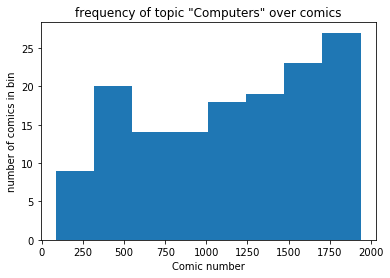

In [34]:
plt.hist(list(df[df.Computers == 1].index), bins=8);
plt.title('frequency of topic "Computers" over comics');
plt.xlabel('Comic number')
plt.ylabel('number of comics in bin')
plt.show();

It looks like the topic has been important throughout the lifetime of the comic, but has gradually increased in frequency in the latter half of publication. Let's look at similar plots for other popular topics.

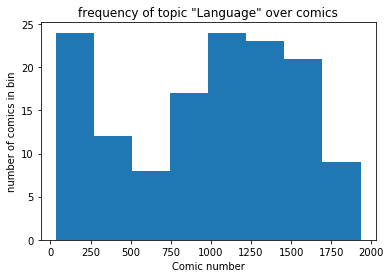

In [35]:
plt.hist(list(df[df.Language == 1].index), bins=8);
plt.title('frequency of topic "Language" over comics');
plt.xlabel('Comic number')
plt.ylabel('number of comics in bin')
plt.show();

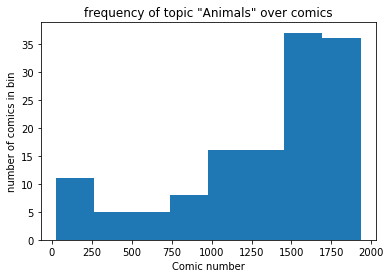

In [37]:
plt.hist(list(df[df.Animals == 1].index), bins=8);
plt.title('frequency of topic "Animals" over comics');
plt.xlabel('Comic number')
plt.ylabel('number of comics in bin')
plt.show();

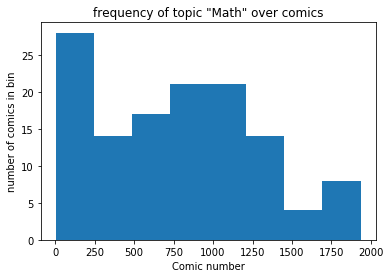

In [36]:
plt.hist(list(df[df.Math == 1].index), bins=8);
plt.title('frequency of topic "Math" over comics');
plt.xlabel('Comic number')
plt.ylabel('number of comics in bin')
plt.show();

Interesting patterns.
## Vectorizing Title Texts

In the spirit of <a href='https://xkcd.com/1838/'>comic 1838</a>, I will analyze title texts by "pouring the data into a big pile of linear algebra." A pet project that comes to mind would be to build a model to predict topics based on the title text and comic transcripts; when I have the time to do it, I'll put it together.

In [41]:
vec = TfidfVectorizer()
X = vec.fit_transform(df.recombined_ttxt)
svd = TruncatedSVD(n_components=69, random_state=0)
norm = Normalizer(copy=False)
lsa = make_pipeline(svd, norm)
X = lsa.fit_transform(X)

In [42]:
tsne = TSNE(random_state=0)
reduced = tsne.fit_transform(X)

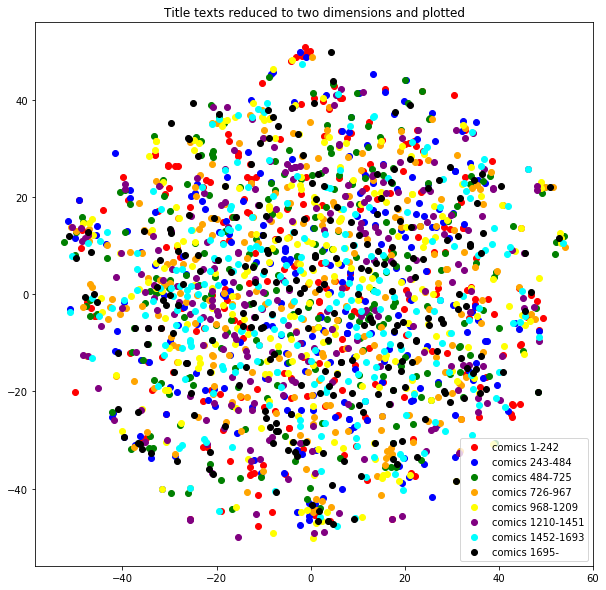

In [57]:
plt.figure(figsize=(10, 10));
plt.scatter(reduced[:242,0], reduced[:242,1], color='red', label='comics 1-242')
plt.scatter(reduced[242:484,0], reduced[242:484,1], color='blue', label='comics 243-484')
plt.scatter(reduced[484:726,0], reduced[484:726,1], color='green', label='comics 484-725')
plt.scatter(reduced[726:968,0], reduced[726:968,1], color='orange', label='comics 726-967')
plt.scatter(reduced[968:1210,0], reduced[968:1210,1], color='yellow', label='comics 968-1209')
plt.scatter(reduced[1210:1452,0], reduced[1210:1452,1], color='purple', label='comics 1210-1451')
plt.scatter(reduced[1452: 1694,0], reduced[1452:1694,1], color='cyan', label='comics 1452-1693')
plt.scatter(reduced[1694:,0], reduced[1694:,1], color='black', label='comics 1695-')
plt.title('Title texts reduced to two dimensions and plotted');
plt.legend();
plt.show();

Well, it's hard to make any sense out of that plot, except that there appears to be no strong patterns associated with title text and comic number group. This could indicate that Randall's title texts have been reasonably consistent throughout the lifetime of the publication.